# Import Standard Packages

In [1]:
import itertools
import joblib
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set();

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_colwidth", 1000)

# Read the Dataset

Membaca dataset yang akan digunakan

In [2]:
df = pd.read_csv('loan_data_2007_2014.csv')

C:\Users\Acer\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Data Understanding

Cuplikan sekilas mengenai nilai yang terdapat didalam data

In [5]:
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1077175,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1076863,"Borrower added on 12/21/11 > to pay for property tax (borrow from friend, need to pay back) & central A/C need to be replace. I'm very sorry to let my loan expired last time.<br>",other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail.action?loan_id=1075358,"Borrower added on 12/21/11 > I plan on combining three large interest bills together and f

## Rincian Dataframe

Melihat kelengkapan nilai dari semua kolom dalam dataframe

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

## Data Duplikat

Melihat apakah ada data duplikat di dataframe

In [7]:
df.duplicated().sum()

0

## Data Hilang

Melihat berapa jumlah baris data yang hilang di setiap kolomnya

In [8]:
df.isnull().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

## Dimensi Data

Melihat dimensi data yaitu jumlah baris dan kolom dalam dataframe

In [9]:
df.shape

(466285, 75)

# Missing Values

Cek persentase missing values pada dataframe

In [10]:
feature_with_na = [features for features in df.columns if df[features].isnull().sum()>1]

for feature in feature_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4), '% Missing Values')

emp_title 0.0592 % Missing Values
emp_length 0.0451 % Missing Values
annual_inc 0.0 % Missing Values
desc 0.7298 % Missing Values
title 0.0 % Missing Values
delinq_2yrs 0.0001 % Missing Values
earliest_cr_line 0.0001 % Missing Values
inq_last_6mths 0.0001 % Missing Values
mths_since_last_delinq 0.5369 % Missing Values
mths_since_last_record 0.8657 % Missing Values
open_acc 0.0001 % Missing Values
pub_rec 0.0001 % Missing Values
revol_util 0.0007 % Missing Values
total_acc 0.0001 % Missing Values
last_pymnt_d 0.0008 % Missing Values
next_pymnt_d 0.4873 % Missing Values
last_credit_pull_d 0.0001 % Missing Values
collections_12_mths_ex_med 0.0003 % Missing Values
mths_since_last_major_derog 0.7877 % Missing Values
annual_inc_joint 1.0 % Missing Values
dti_joint 1.0 % Missing Values
verification_status_joint 1.0 % Missing Values
acc_now_delinq 0.0001 % Missing Values
tot_coll_amt 0.1507 % Missing Values
tot_cur_bal 0.1507 % Missing Values
open_acc_6m 1.0 % Missing Values
open_il_6m 1.0 % M

# Define the Target Feature

Melihat nilai unik pada target feature yaitu pada kolom **'loan_status'**

In [11]:
df['loan_status'].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Dalam project ini, saya ditugaskan untuk menentukan pinjaman mana yang berkemungkinan untuk gagal bayar. Dengan menggunakan dataset yang diberikan, saya akan mengklasifikasikan
pelanggan ke dalam 2 kategori target yaitu **Berhasil** dan **Gagal**. Dikarenakan nilai unik pada **'loan_status'** ada banyak, kita akan memasukan kategori tersebut
pada angka biner 1 dan 0, dengan keterangan:<br>
    1 = Berhasil Bayar (Value: **Fully Paid**)<br>
    0 = Gagal Bayar (Value: **Charged Off, Default dan Does not meet the credit policy. Status**)<br>

Untuk value seperti **Late, Current dan in_grace_period** tidak akan dimasukan karena status dari pinjaman tersebut masih berjalan.

In [12]:
# Tentukan kategori yang akan dimasukan
good = ['Fully Paid']
bad = ['Charged Off','Default','Does not meet the credit policy. Status:Fully Paid','Does not meet the credit policy. Status:Fully Paid']

# Ganti label pada loan_status
def loan_status_label(value):
    if value in good:
        return 1
    return 0

In [13]:
# Menerapkan Fungsi
df_new = df[df['loan_status'].isin(good + bad)].copy()
df_new['loan_status'] = df['loan_status'].apply(loan_status_label)

# Exploratory Data Analysis

Melihat distribusi dari Target Feature yaitu Status Pinjaman

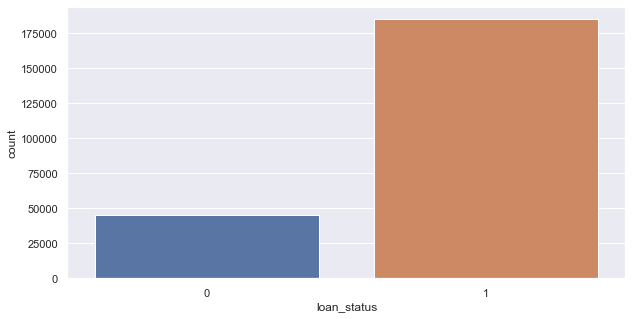

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=df_new, x='loan_status')
plt.show()

## Korelasi Antar Feature

In [15]:
# Hitung korelasi tiap variabel
correlations = (df_new.select_dtypes(exclude=object)
                         .corr()
                         .dropna(how="all", axis=0)
                         .dropna(how="all", axis=1)
)

In [16]:
correlations["loan_status"].abs().sort_values(ascending=False)

loan_status                    1.000000
total_rec_prncp                0.457482
recoveries                     0.449290
last_pymnt_amnt                0.382417
total_pymnt_inv                0.354511
total_pymnt                    0.352205
collection_recovery_fee        0.305170
int_rate                       0.241592
total_rec_late_fee             0.149802
dti                            0.109891
out_prncp                      0.100818
out_prncp_inv                  0.100816
inq_last_6mths                 0.098907
revol_util                     0.089972
tot_cur_bal                    0.076230
annual_inc                     0.061866
total_rev_hi_lim               0.052931
loan_amnt                      0.052880
funded_amnt                    0.052618
funded_amnt_inv                0.046371
installment                    0.036715
total_rec_int                  0.035606
mths_since_last_record         0.033175
total_acc                      0.029480
mths_since_last_delinq         0.025818


In [17]:
# Saring korelasi antara vmin - vmax
vmin, vmax = 0.1, 0.99

unstack_corr = correlations.unstack()
pos_corr = (unstack_corr > vmin) & (unstack_corr < vmax)
neg_corr = (unstack_corr > -vmax) & (unstack_corr < -vmin)
high_corr = unstack_corr[pos_corr | neg_corr]

trimmed_corr = high_corr.sort_values(ascending=False).unstack()

In [18]:
# Buat mask untuk membentuk matriks segitiga bawah
mask = np.zeros_like(trimmed_corr)
mask[np.triu_indices_from(mask)] = True

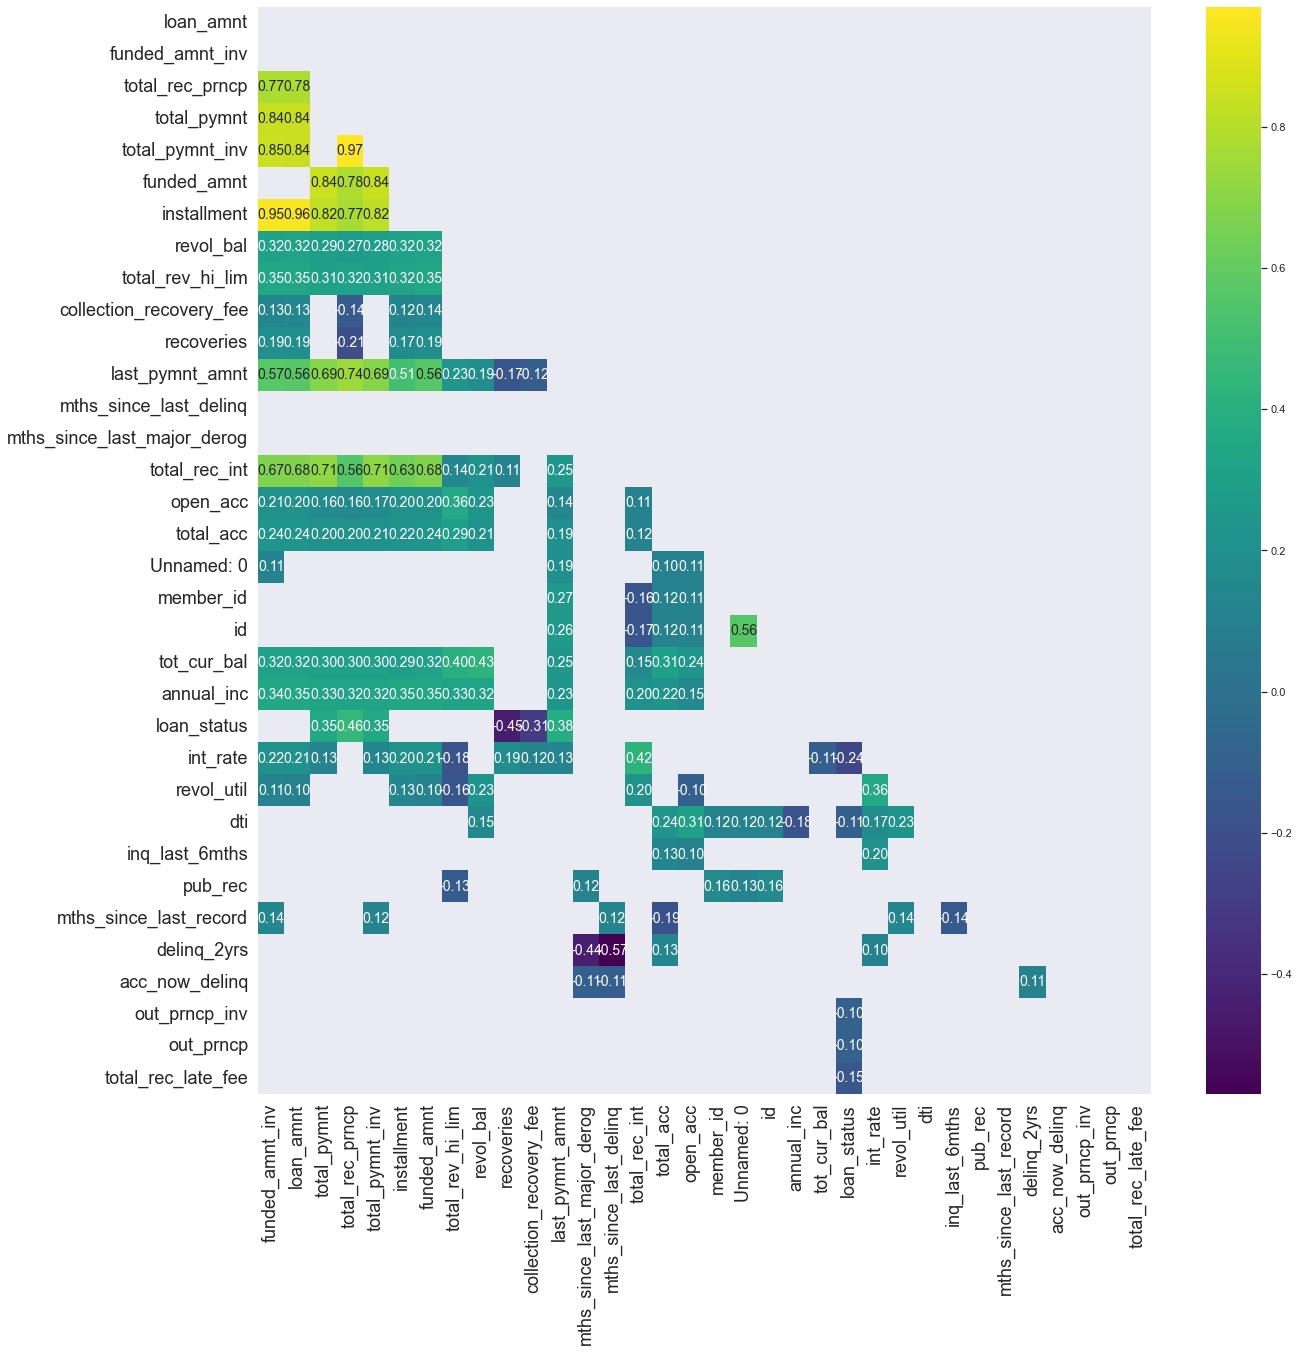

In [19]:
# Tampilkan heatmap
plt.figure(figsize=(20, 20))
plot = sns.heatmap(
    trimmed_corr, 
    annot=True, 
    mask=mask,
    fmt=".2f", 
    cmap="viridis", 
    annot_kws={"size": 14})

plot.set_xticklabels(plot.get_xticklabels(), size=18)
plot.set_yticklabels(plot.get_yticklabels(), size=18)
plt.show()

Dari heatmap diatas terdapat beberapa variabel yang memiliki pengaruh terhadap status pinjaman, diantaranya:

In [20]:
affect_loan = high_corr.loc["loan_status"].abs().sort_values(ascending=False)
affect_loan

total_rec_prncp            0.457482
recoveries                 0.449290
last_pymnt_amnt            0.382417
total_pymnt_inv            0.354511
total_pymnt                0.352205
collection_recovery_fee    0.305170
int_rate                   0.241592
total_rec_late_fee         0.149802
dti                        0.109891
out_prncp                  0.100818
out_prncp_inv              0.100816
dtype: float64

Sedangkan fitur yang saling berkorelasi dengan yang sebelumnya perlu kita identifikasi. Kita menggunakan nilai batas 0.9 untuk mencari fitur yang saling berkorelasi kuat.

In [21]:
threshold = 0.9
affect_collision = (high_corr.abs()
                             .loc[high_corr > threshold]
                             .loc[affect_loan.index, affect_loan.index]
                             .sort_values(ascending=False)
)
affect_collision

total_rec_prncp  total_pymnt        0.975051
total_pymnt      total_rec_prncp    0.975051
total_rec_prncp  total_pymnt_inv    0.969522
total_pymnt_inv  total_rec_prncp    0.969522
dtype: float64

Berdasarkan besar pengaruhnya terhadap status pinjaman, fitur yang saling berkorelasi akan dipilih berdasarkan yang paling berpengaruh.

In [22]:
left_index = affect_collision.index.get_level_values(0)
right_index = affect_collision.index.get_level_values(1)

def remove_collide_index(left_index, right_index):
    include, exclude = [], []

    for left, right in zip(left_index, right_index):
        if left not in include and left not in exclude:
            include.append(left)
        if right not in include and right not in exclude:
            exclude.append(right)
        
    return include, exclude


include_affect_col, exclude_affect_col = remove_collide_index(left_index, right_index)
include_affect_col, exclude_affect_col

(['total_rec_prncp'], ['total_pymnt', 'total_pymnt_inv'])

Fitur numerik berpengaruh yang akan kita gunakan

In [23]:
affect_num_cols = affect_loan[~affect_loan.index.isin(exclude_affect_col)].index.to_list()
affect_num_cols

['total_rec_prncp',
 'recoveries',
 'last_pymnt_amnt',
 'collection_recovery_fee',
 'int_rate',
 'total_rec_late_fee',
 'dti',
 'out_prncp',
 'out_prncp_inv']

## Loan Status dan Besar Pinjaman Pokok yang Sudah Dibayarkan

Principal adalah besar pinjaman pokok yang dipinjamkan kepada debitur. Dengan kata lain merupakan jumlah asli dari uang yang dipinjamkan. Orang yang mengalami gagal bayar kebanyakan belum dapat membayarkan uang pokok pembayaran hingga jatuh tempo, bisa dilihat dari distribusi pembayaran dibawah. Rata-ratanya hampir mencapai 0.

In [24]:
title_font = dict(size=20, weight="bold")

def plot_count(df, y, title, **sns_kwargs):
    value_counts = df[y].value_counts()
    percentage = value_counts / value_counts.sum()
    percentage = percentage.apply("{:.2%}".format)

    plt.figure(figsize=(14, 10))
    plt.title(title, fontdict=title_font)
    sns.countplot(data=df, y=y, order=value_counts.index, **sns_kwargs)
    plt.ylabel("")
    plt.show()

    print(percentage)


def plot_distribution(df, x, title, **sns_kwargs):
    plt.figure(figsize=(14, 10))
    plt.title(title, fontdict=title_font)
    sns.histplot(data=df, x=x, kde=True, **sns_kwargs)
    plt.ylabel("")
    plt.show()


def plot_boxplot(df, x, y, title, **sns_kwargs):
    plt.figure(figsize=(14, 10))
    plt.title(title, fontdict=title_font)
    sns.boxplot(data=df, x=x, y=y, **sns_kwargs)
    plt.ylabel("")
    plt.show()

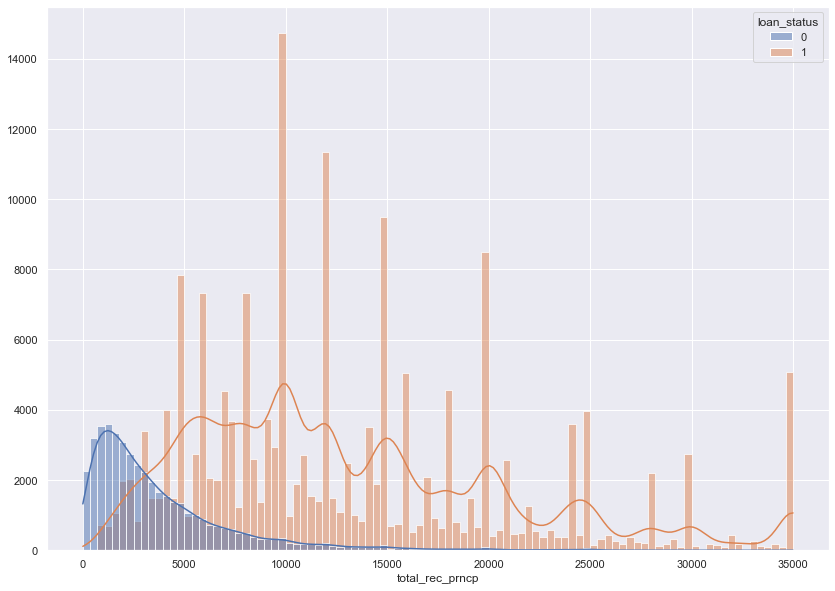

In [25]:
plot_distribution(df=df_new, x="total_rec_prncp", hue="loan_status", title="")

## Loan Status dan Total Uang yang Tidak Ditagihkan

Charged off recoveries adalah total uang yang tidak bisa dibayarkan kepada perusahaan peminjam karena sudah lewat masa jatuh tempo sehingga perusahaan peminjam bisa melepas hak tagih utang tersebut dengan menjualnya ke perusahaan lain. Dari sini terlihat jelas bahwa orang dengan status pinjaman buruk lah yang paling banyak memiliki charge off recoveries.

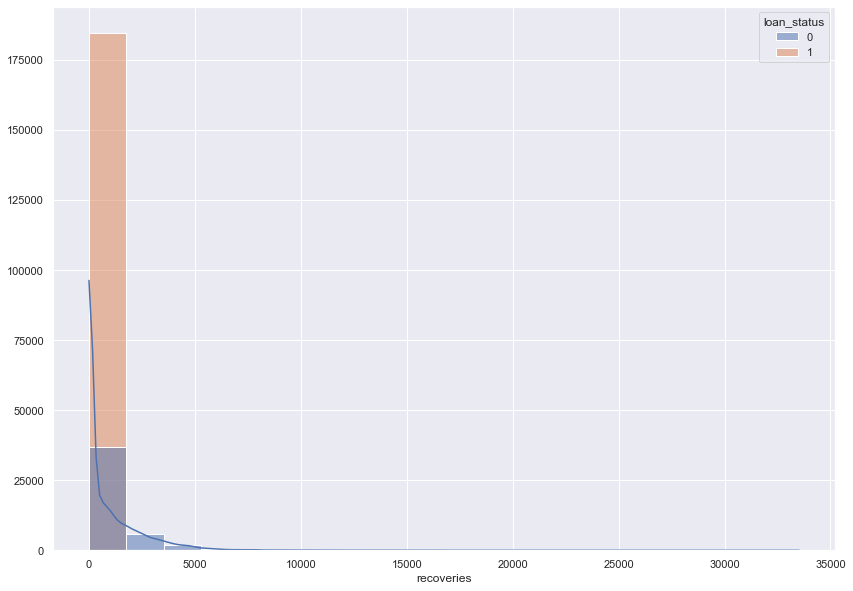

In [26]:
plot_distribution(df=df_new, x="recoveries", hue="loan_status", title="")

# Loan Status dan Jumlah Pinjaman

Rata-rata jumlah pinjaman terbanyak berada pada status buruk.

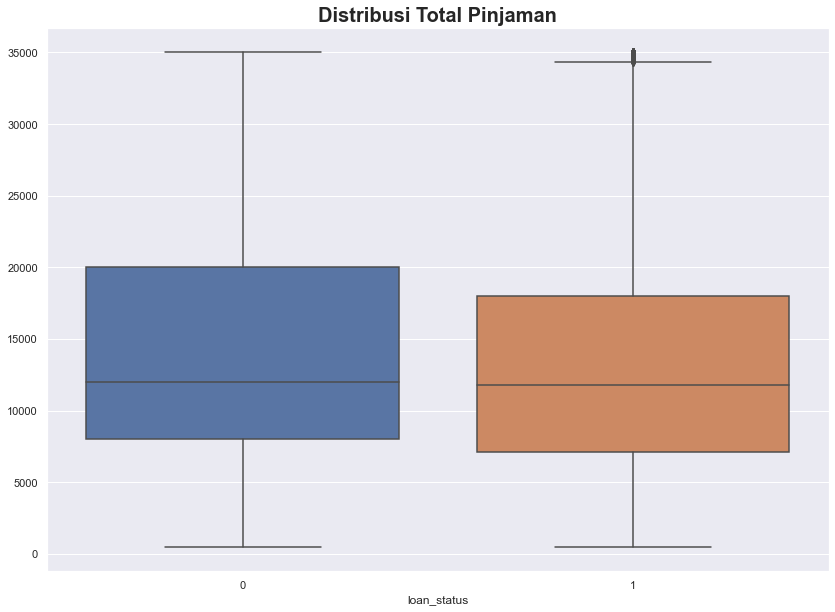

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,45295.0,14284.170990,8369.207368,500.0,8000.0,12000.0,20000.0,35000.0
1,184739.0,13214.394226,7949.030252,500.0,7125.0,11800.0,18000.0,35000.0


In [27]:
x, y = "loan_status", "loan_amnt"
plot_boxplot(df=df_new, x=x, y=y, title="Distribusi Total Pinjaman")
df_new.groupby(x)[y].describe()

## Loan Status dan Total Pembayaran yang Diterima

Tampak jelas apabila total pembayaran terbanyak berada pada pinjaman yang berstatus baik.

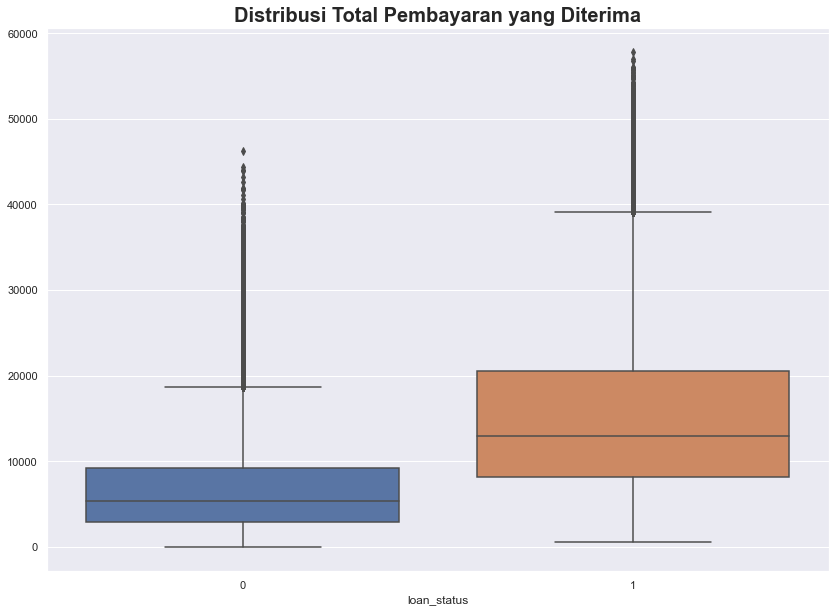

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
0,45295.0,6848.243678,5618.218343,0.00,2857.645000,5298.60000,9163.125,46199.44000
1,184739.0,15209.872007,9459.142043,526.33,8092.460697,12979.34106,20491.905,57777.57987


In [28]:
x, y = "loan_status", "total_pymnt"
plot_boxplot(df=df_new, x=x, y=y, title="Distribusi Total Pembayaran yang Diterima")
df_new.groupby(x)[y].describe()

## Tujuan Mengambil Pinjaman

Lebih dari setengah peminjam memiliki tujuan untuk menutup pinjaman sebelumnya. Apabila dilihat dari jenisnya, tujuan untuk konsumsi lebih banyak daripada tujuan untuk bisnis, renovasi dan pendidikan.

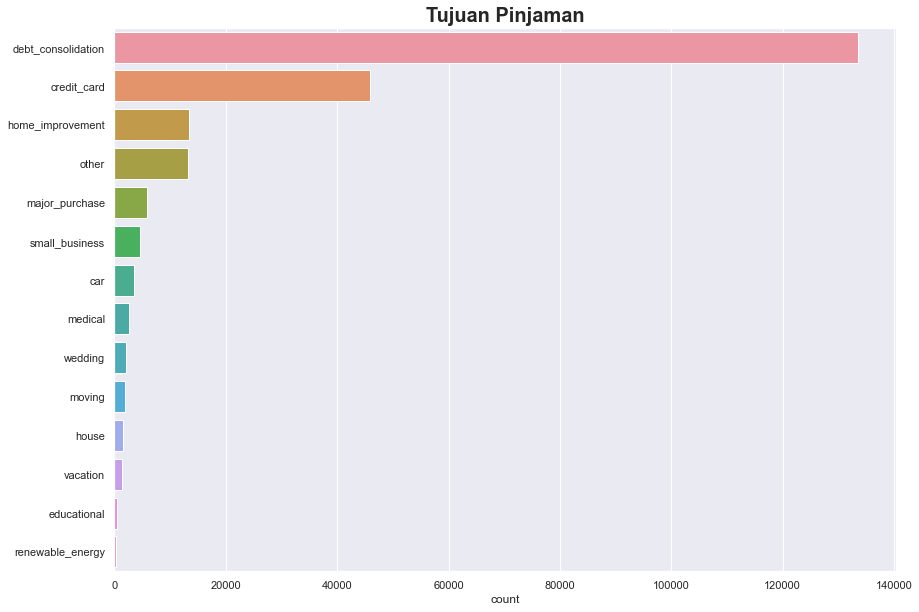

debt_consolidation    58.09%
credit_card           19.99%
home_improvement       5.81%
other                  5.73%
major_purchase         2.53%
small_business         1.99%
car                    1.50%
medical                1.14%
wedding                0.87%
moving                 0.80%
house                  0.65%
vacation               0.62%
educational            0.17%
renewable_energy       0.11%
Name: purpose, dtype: object


In [29]:
plot_count(df_new, y="purpose", title="Tujuan Pinjaman")

## Negara Asal Peminjam

Peminjam sebagian besar berasal dari negara Kanada.

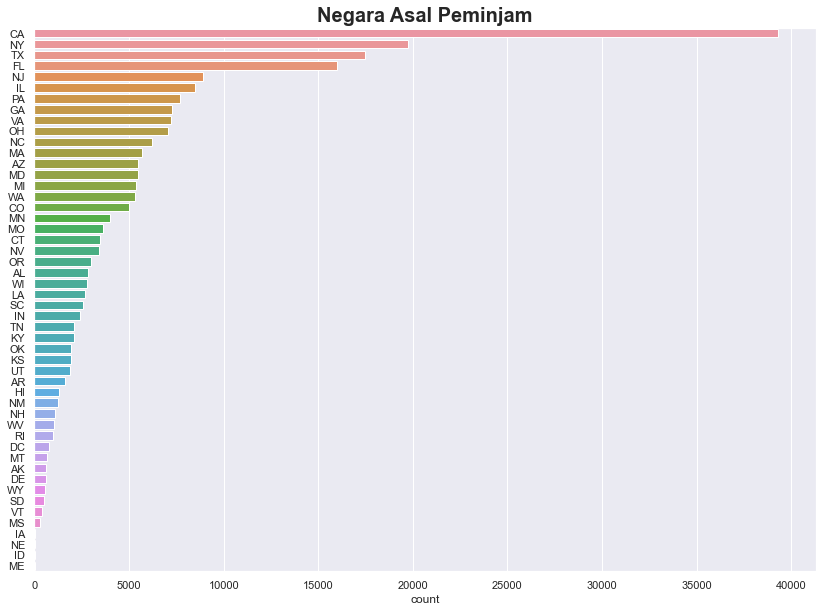

CA    17.10%
NY     8.58%
TX     7.60%
FL     6.95%
NJ     3.87%
IL     3.69%
PA     3.35%
GA     3.17%
VA     3.14%
OH     3.06%
NC     2.70%
MA     2.48%
AZ     2.38%
MD     2.37%
MI     2.33%
WA     2.32%
CO     2.18%
MN     1.73%
MO     1.59%
CT     1.50%
NV     1.48%
OR     1.31%
AL     1.24%
WI     1.21%
LA     1.16%
SC     1.12%
IN     1.04%
TN     0.91%
KY     0.90%
OK     0.84%
KS     0.83%
UT     0.82%
AR     0.70%
HI     0.57%
NM     0.54%
NH     0.46%
WV     0.45%
RI     0.43%
DC     0.34%
MT     0.29%
AK     0.27%
DE     0.26%
WY     0.24%
SD     0.21%
VT     0.17%
MS     0.12%
IA     0.00%
NE     0.00%
ID     0.00%
ME     0.00%
Name: addr_state, dtype: object


In [30]:
plot_count(df=df_new, y="addr_state", title="Negara Asal Peminjam")

## Tingkat Pinjaman

Pinjaman diberi tingkatan dari huruf abjad A sampai G, semakin mendekati G maka tingkat bunga yang dibayarkan lebih besar.

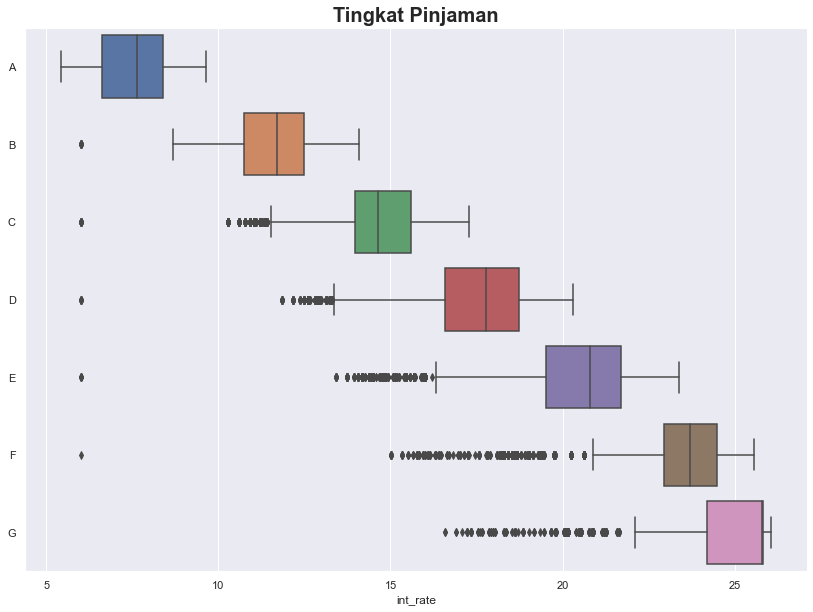

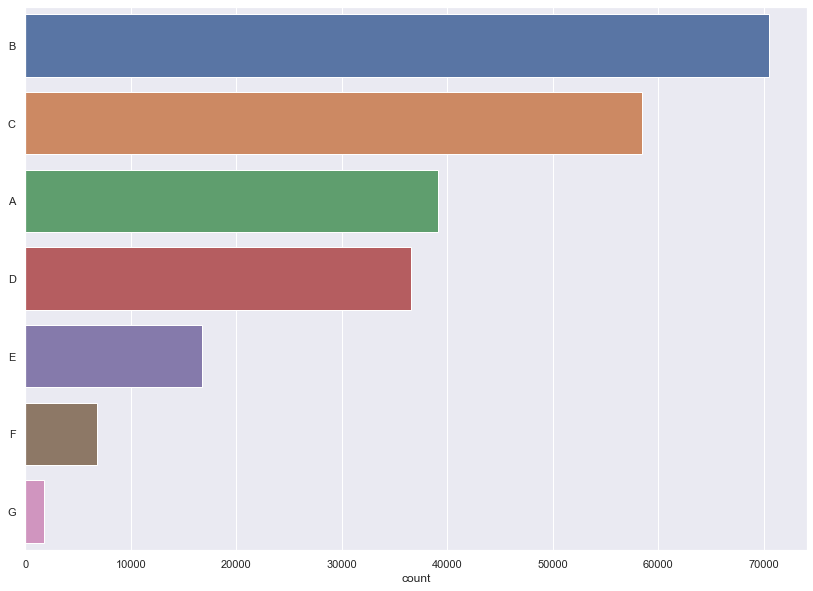

B    30.66%
C    25.42%
A    17.00%
D    15.89%
E     7.30%
F     2.96%
G     0.78%
Name: grade, dtype: object


,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,39102.0,7.545586,1.003550,5.42,6.62,7.62,8.39,9.63
B,70537.0,11.655698,1.280947,6.00,10.74,11.71,12.49,14.09
C,58478.0,14.772971,1.229053,6.00,13.98,14.64,15.61,17.27
D,36543.0,17.645856,1.468146,6.00,16.59,17.77,18.75,20.31
E,16787.0,20.386300,1.867371,6.00,19.52,20.80,21.70,23.40
F,6803.0,23.218681,1.983960,6.00,22.95,23.70,24.50,25.57
G,1784.0,24.406844,2.295240,16.59,24.20,25.80,25.83,26.06


In [31]:
x, y = "int_rate", "grade"
order = df_new[y].sort_values().unique()
plot_boxplot(df_new, x=x, y=y, title="Tingkat Pinjaman", order=order)
plot_count(df=df_new, y=y, title="")
df_new.groupby(y)[x].describe()

## Status Kepemilikan Rumah

Sebagian besar peminjam mendelegasikan rumahnya sebagai jaminan pinjaman, sedangkan hanya sedikit dari peminjam yang memiliki rumah sendiri.

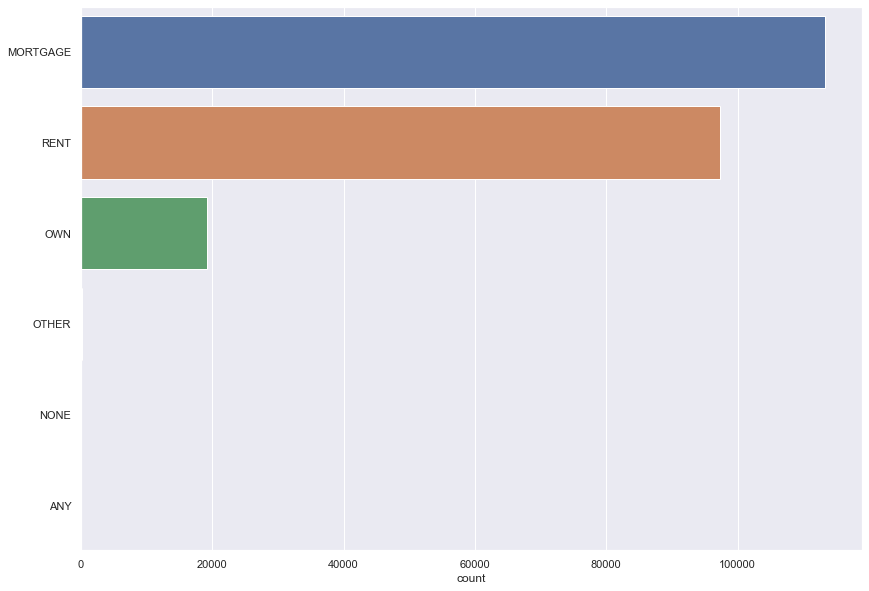

MORTGAGE    49.24%
RENT        42.28%
OWN          8.38%
OTHER        0.07%
NONE         0.02%
ANY          0.00%
Name: home_ownership, dtype: object


In [33]:
y = "home_ownership"
order = df_new[y].sort_values().unique()
plot_count(df=df_new, y=y, title="")

# Data Preprocessing

Setelah melihat info dan deskripsi dari data diatas, terdapat fitur yang tidak perlu kita pakai karena tidak begitu signifikan untuk digunakan sebagai fitur dalam prediksi.

In [34]:
# Informasi rinci mengenai kolom dan baris data
data_stat = pd.DataFrame()
data_stat.index = df_new.columns
data_stat["unique_value"] = df_new.nunique()
data_stat["missing_rate"] = df_new.isna().mean()
data_stat["dtype"] = df_new.dtypes
data_stat

,unique_value,missing_rate,dtype
Unnamed: 0,230034,0.000000,int64
id,230034,0.000000,int64
member_id,230034,0.000000,int64
loan_amnt,1306,0.000000,int64
funded_amnt,1309,0.000000,int64
funded_amnt_inv,9180,0.000000,float64
term,2,0.000000,object
int_rate,503,0.000000,float64
installment,42890,0.000000,float64
grade,7,0.000000,object


Kolom dengan data yang tidak bisa dipakai

In [35]:
# Kolom yang semua datanya hilang
miss_col = data_stat[data_stat["missing_rate"] == 1].index.to_list()
print("Kolom yang semua datanya hilang:")
print(miss_col)
print()

# Kolom yang terlalu unik
vari_col = data_stat[data_stat["unique_value"] == df_new.shape[0]].index.to_list()
print("Kolom yang terlalu unik:")
print(vari_col)
print()

# Kolom dengan kategori yang banyak
cat_col_stat = data_stat[data_stat["dtype"] == "object"]
vari_cat_col = cat_col_stat[cat_col_stat["unique_value"] > 1000].index.to_list()
print("Kolom dengan kategori yang banyak:")
print(vari_cat_col)
print()

# Kolom yang terdiri dari satu nilai
single_valued_col = data_stat[data_stat["unique_value"] == 1].index.to_list()
print("Kolom yang terlalu unik:")
print(single_valued_col)
print()

removed_features = miss_col + vari_col + vari_cat_col + single_valued_col

Kolom yang semua datanya hilang:
['annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m']

Kolom yang terlalu unik:
['Unnamed: 0', 'id', 'member_id', 'url']

Kolom dengan kategori yang banyak:
['emp_title', 'url', 'desc', 'title']

Kolom yang terlalu unik:
['policy_code', 'application_type']



In [36]:
# Hilangkan fitur yang tidak terpakai
pre_df = df_new.loc[:, ~df_new.columns.isin(removed_features)].copy()
pre_df.shape

(230034, 49)

## Categorical Feature

In [37]:
# Kolom-kolom yang berdata kategorik
cat_features = pre_df.select_dtypes(include=object).columns
cat_features

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'issue_d', 'pymnt_plan', 'purpose', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d'],
      dtype='object')

## Kolom berisikan tanggal

In [38]:
date_cols = ["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d", "next_pymnt_d"]

for col in date_cols:
    print(pre_df[col].value_counts().iloc[:5])
    print()

Oct-14    8808
Jul-14    8614
Apr-14    6744
Nov-13    6665
Oct-13    6653
Name: issue_d, dtype: int64

Oct-00    1967
Oct-99    1833
Nov-00    1791
Oct-01    1775
Aug-00    1756
Name: earliest_cr_line, dtype: int64

Jul-15    11703
Mar-15    10087
Jun-15    10078
Apr-15    10051
Aug-15     9932
Name: last_pymnt_d, dtype: int64

Jan-16    93368
Dec-15    13752
Nov-15     8197
Sep-15     7941
Oct-15     7803
Name: last_credit_pull_d, dtype: int64

Feb-16    795
Apr-11     90
Mar-11     81
Feb-11     78
May-11     68
Name: next_pymnt_d, dtype: int64



Tidak terdapat korelasi yang kuat antar tanggal serta tiap tanggal memiliki sedikit korelasi dengan status pinjaman. Namun kita akan menghapus fitur tanggal yang berkorelasi kurang dari 0.1 dengan status pinjaman

In [39]:
# Fitur tanggal yang akan kita gunakan
affect_date_cols = ["issue_d", "last_pymnt_d", "last_credit_pull_d", "next_pymnt_d"]
affect_date_cols

['issue_d', 'last_pymnt_d', 'last_credit_pull_d', 'next_pymnt_d']

In [40]:
# Hapus fitur tanggal yang tidak memiliki korelasi kuat dengan status pinjaman
unused_cols = ["earliest_cr_line"]
pre_df = pre_df.drop(columns=unused_cols, errors="ignore")
pre_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,1,n,credit_card,860xx,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,0,n,car,309xx,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,1,n,small_business,606xx,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,1,n,other,917xx,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,1,n,wedding,852xx,AZ,11.20,0.0,3.0,NaN,NaN,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,NaN,Sep-15,0.0,NaN,0.0,NaN,NaN,NaN


##  Categorical Column yang tidak dipokai

In [41]:
other_cat_cols = cat_features[~cat_features.isin(date_cols)]
other_cat_cols

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'pymnt_plan', 'purpose', 'zip_code',
       'addr_state', 'initial_list_status'],
      dtype='object')

In [42]:
pre_df.loc[:, other_cat_cols].head()

,term,grade,sub_grade,emp_length,home_ownership,verification_status,pymnt_plan,purpose,zip_code,addr_state,initial_list_status
0,36 months,B,B2,10+ years,RENT,Verified,n,credit_card,860xx,AZ,f
1,60 months,C,C4,< 1 year,RENT,Source Verified,n,car,309xx,GA,f
2,36 months,C,C5,10+ years,RENT,Not Verified,n,small_business,606xx,IL,f
3,36 months,C,C1,10+ years,RENT,Source Verified,n,other,917xx,CA,f
5,36 months,A,A4,3 years,RENT,Source Verified,n,wedding,852xx,AZ,f


Beberapa kolom kategorikal yang tidak terpakai adalah:<br>

- desc dan title karena merupakan teks.
- zip_code karena 3 angka dibelakangnya disensor
- sub_grade karena sudah memiliki kolom yang mirip yaitu grade

In [43]:
unused_cols = ["desc", "zip_code", "sub_grade", "title"]
pre_df = pre_df.drop(columns=unused_cols, errors="ignore")
pre_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,1,n,credit_card,AZ,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,0,n,car,GA,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,1,n,small_business,IL,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,1,n,other,CA,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,3 years,RENT,36000.0,Source Verified,Dec-11,1,n,wedding,AZ,11.20,0.0,3.0,NaN,NaN,9.0,0.0,7963,28.3,12.0,f,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,NaN,Sep-15,0.0,NaN,0.0,NaN,NaN,NaN


In [44]:
other_cat_cols = cat_features[~cat_features.isin(date_cols + unused_cols)]
other_cat_cols

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status'],
      dtype='object')

Terdapat korelasi yang kuat antara emp_title dengan status pinjaman, disusul dengan grade dan term. Fitur yang kurang berpengaruh lainnya tidak akan digunakan untuk prediksi.

In [45]:
# Fitur kategorikal yang akan kita gunakan
affect_cat_cols = ["grade", "term"]
affect_cat_cols

['grade', 'term']

In [46]:
# Hapus fitur yang kurang berpengaruh
used_cols = ["emp_title", "grade", "term"]
unused_cols = other_cat_cols[~other_cat_cols.isin(used_cols)]
pre_df = pre_df.drop(columns=unused_cols, errors="ignore")
pre_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,annual_inc,issue_d,loan_status,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,24000.0,Dec-11,1,27.65,0.0,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,30000.0,Dec-11,0,1.00,0.0,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,12252.0,Dec-11,1,8.72,0.0,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,49200.0,Dec-11,1,20.00,0.0,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,0.0,NaN,NaN,NaN
5,5000,5000,5000.0,36 months,7.90,156.46,A,36000.0,Dec-11,1,11.20,0.0,3.0,NaN,NaN,9.0,0.0,7963,28.3,12.0,0.0,0.0,5631.377753,5631.38,5000.00,631.38,0.00,0.00,0.00,Jan-15,161.03,NaN,Sep-15,0.0,NaN,0.0,NaN,NaN,NaN


## Feature yang berkorelasi dengan target

In [47]:
# Kolom-kolom yang akan kita gunakan
predictor_cols = affect_num_cols + affect_cat_cols + affect_date_cols
predictor_cols

['total_rec_prncp',
 'recoveries',
 'last_pymnt_amnt',
 'collection_recovery_fee',
 'int_rate',
 'total_rec_late_fee',
 'dti',
 'out_prncp',
 'out_prncp_inv',
 'grade',
 'term',
 'issue_d',
 'last_pymnt_d',
 'last_credit_pull_d',
 'next_pymnt_d']

# Feature Engineering

## Imputasi pada kolom missing value

Missing value terbanyak dimiliki oleh fitur next_pyment_d karena bisa jadi peminjam yang sudah melunasi utangnya tidak akan memiliki jadwal pembayaran lagi.

In [48]:
pre_df[predictor_cols].isna().mean().sort_values(ascending=False)

next_pymnt_d               0.987741
last_pymnt_d               0.001582
last_credit_pull_d         0.000100
total_rec_prncp            0.000000
recoveries                 0.000000
last_pymnt_amnt            0.000000
collection_recovery_fee    0.000000
int_rate                   0.000000
total_rec_late_fee         0.000000
dti                        0.000000
out_prncp                  0.000000
out_prncp_inv              0.000000
grade                      0.000000
term                       0.000000
issue_d                    0.000000
dtype: float64

In [49]:
# Isi data dengan "no"
pre_df["next_pymnt_d"] = pre_df["next_pymnt_d"].fillna("no")
top_next_pyment_d = pre_df["next_pymnt_d"].value_counts().head()
top_next_pyment_d

no        227214
Feb-16       795
Apr-11        90
Mar-11        81
Feb-11        78
Name: next_pymnt_d, dtype: int64

Lakukan hal yang sama pada kolom last_pymnt_d dan last_credit_pull_d

In [50]:
pre_df["last_pymnt_d"] = pre_df["last_pymnt_d"].fillna("no")
pre_df["last_credit_pull_d"] = pre_df["last_credit_pull_d"].fillna("no")

Isi missing value data numerik menggunakan nilai modus

In [51]:
mode = pre_df["inq_last_6mths"].mode().values[0]
pre_df["inq_last_6mths"] = pre_df["inq_last_6mths"].fillna(mode)

Cek kembali apakah masih ada data yang hilang

In [52]:
pre_df[predictor_cols].isna().mean().sort_values(ascending=False)

total_rec_prncp            0.0
recoveries                 0.0
last_pymnt_amnt            0.0
collection_recovery_fee    0.0
int_rate                   0.0
total_rec_late_fee         0.0
dti                        0.0
out_prncp                  0.0
out_prncp_inv              0.0
grade                      0.0
term                       0.0
issue_d                    0.0
last_pymnt_d               0.0
last_credit_pull_d         0.0
next_pymnt_d               0.0
dtype: float64

# Modeling

## Menentukan Target dan Feature data

Label merupakan tingkat performa dari pinjaman yang berada pada kolom loan_status. Berhubung kolom tersebut memiliki beberapa kategori, kita sudah memilih dan menggabungkannya menjadi 2 kategori yaitu baik dan buruk.<br>

Sebelumnya, kita perlu memisahkan label dan fitur dari data untuk kemudian dapat dilakukan pemisahan data.

In [53]:
label = pre_df["loan_status"].copy()
features = pre_df[predictor_cols].copy()

print("Label shape:")
print(label.shape)

print("Features shape:")
print(features.shape)

Label shape:
(230034,)
Features shape:
(230034, 15)


In [54]:
num_features = features.select_dtypes(exclude="object")
cat_features = features.select_dtypes(include="object")

In [55]:
# Normalisasi fitur numerik
num_features = (num_features - num_features.mean()) / num_features.std()
num_features

,total_rec_prncp,recoveries,last_pymnt_amnt,collection_recovery_fee,int_rate,total_rec_late_fee,dti,out_prncp,out_prncp_inv
0,-0.769580,-0.222470,-0.824326,-0.151108,-0.715540,-0.137908,1.471932,-0.049921,-0.04992
1,-1.324335,-0.070220,-0.831857,-0.141664,0.340937,-0.137908,-2.001180,-0.049921,-0.04992
2,-1.087034,-0.222470,-0.755008,-0.151108,0.498723,-0.137908,-0.995085,-0.049921,-0.04992
3,-0.159093,-0.222470,-0.797389,-0.151108,-0.066104,2.817122,0.474960,-0.049921,-0.04992
5,-0.769580,-0.222470,-0.825861,-0.151108,-1.344395,-0.137908,-0.671884,-0.049921,-0.04992
...,...,...,...,...,...,...,...,...,...
466276,-1.336103,1.285202,-0.817655,-0.052468,1.022388,-0.137908,-0.531135,-0.049921,-0.04992
466277,-0.820753,-0.222470,-0.767570,-0.151108,-1.344395,-0.137908,-0.785265,-0.049921,-0.04992
466278,-0.159093,-0.222470,-0.051855,-0.151108,1.022388,-0.137908,-0.623665,-0.049921,-0.04992
466281,-1.155770,-0.222470,-0.846663,-0.151108,1.415708,-0.137908,0.272959,-0.049921,-0.04992


In [56]:
# OneHotEncode fitur kategorik
cat_features = pd.get_dummies(cat_features)
cat_features

,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,term_ 36 months,term_ 60 months,issue_d_Apr-08,issue_d_Apr-09,issue_d_Apr-10,issue_d_Apr-11,issue_d_Apr-12,issue_d_Apr-13,issue_d_Apr-14,issue_d_Aug-07,issue_d_Aug-08,issue_d_Aug-09,issue_d_Aug-10,issue_d_Aug-11,issue_d_Aug-12,issue_d_Aug-13,issue_d_Aug-14,issue_d_Dec-07,issue_d_Dec-08,issue_d_Dec-09,issue_d_Dec-10,issue_d_Dec-11,issue_d_Dec-12,issue_d_Dec-13,issue_d_Dec-14,issue_d_Feb-08,issue_d_Feb-09,issue_d_Feb-10,issue_d_Feb-11,issue_d_Feb-12,issue_d_Feb-13,issue_d_Feb-14,issue_d_Jan-08,issue_d_Jan-09,issue_d_Jan-10,issue_d_Jan-11,issue_d_Jan-12,issue_d_Jan-13,issue_d_Jan-14,issue_d_Jul-07,issue_d_Jul-08,issue_d_Jul-09,issue_d_Jul-10,...,next_pymnt_d_Jul-15,next_pymnt_d_Jun-08,next_pymnt_d_Jun-09,next_pymnt_d_Jun-10,next_pymnt_d_Jun-11,next_pymnt_d_Jun-12,next_pymnt_d_Jun-13,next_pymnt_d_Jun-14,next_pymnt_d_Jun-15,next_pymnt_d_Mar-08,next_pymnt_d_Mar-09,next_pymnt_d_Mar-10,next_pymnt_d_Mar-11,next_pymnt_d_Mar-12,next_pymnt_d_Mar-13,next_pymnt_d_Mar-14,next_pymnt_d_Mar-15,next_pymnt_d_May-08,next_pymnt_d_May-09,next_pymnt_d_May-10,next_pymnt_d_May-11,next_pymnt_d_May-12,next_pymnt_d_May-13,next_pymnt_d_May-14,next_pymnt_d_May-15,next_pymnt_d_Nov-08,next_pymnt_d_Nov-09,next_pymnt_d_Nov-10,next_pymnt_d_Nov-11,next_pymnt_d_Nov-12,next_pymnt_d_Nov-13,next_pymnt_d_Nov-14,next_pymnt_d_Nov-15,next_pymnt_d_Oct-08,next_pymnt_d_Oct-09,next_pymnt_d_Oct-10,next_pymnt_d_Oct-11,next_pymnt_d_Oct-12,next_pymnt_d_Oct-13,next_pymnt_d_Oct-14,next_pymnt_d_Oct-15,next_pymnt_d_Sep-08,next_pymnt_d_Sep-09,next_pymnt_d_Sep-10,next_pymnt_d_Sep-11,next_pymnt_d_Sep-12,next_pymnt_d_Sep-13,next_pymnt_d_Sep-14,next_pymnt_d_Sep-15,next_pymnt_d_no
0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466276,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
466277,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
466278,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
466281,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [57]:
# Gabungkan Fitur
features_full = pd.concat([num_features, cat_features], axis=1)

features_full.shape

## Train Test Split

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_full, label, test_size=0.2, random_state=42, stratify=label)

In [59]:
X_train.shape, y_train.shape

((184027, 411), (184027,))

## Fitting

In [58]:
from sklearn.linear_model import LogisticRegression
logres = LogisticRegression(max_iter=500, solver="sag", class_weight="balanced", n_jobs=-1)
logres

LogisticRegression(class_weight='balanced', max_iter=500, n_jobs=-1,
                   solver='sag')

In [59]:
logres.fit(X_train, y_train)

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(class_weight='balanced', max_iter=500, n_jobs=-1,
                   solver='sag')

##  Save Model

In [61]:
joblib.dump(logres, "logres.z")

['logres.z']

In [62]:
logres = joblib.load("logres.z")

# Model Evaluation

Kita akan membuat model prediksi paling sederhana yaitu dengan memprediksi seluruh data kategori terbanyak. Hal ini dilakukan supaya kita mendapatkan patokan, berapa performa minimal yang harus dilalui oleh model machine learning kita nantinya.

In [63]:
test_label_counts = y_test.value_counts()
test_label_counts

1    36948
0     9059
Name: loan_status, dtype: int64

In [64]:
test_label_counts.max() / test_label_counts.sum()

0.8030951811680831

## Classification Metrics

### Training

In [65]:
logres.score(X_train, y_train)

0.966950501828536

In [66]:
report = classification_report(y_true=y_train, y_pred=logres.predict(X_train))
print(report)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     36236
           1       0.99      0.97      0.98    147791

    accuracy                           0.97    184027
   macro avg       0.93      0.97      0.95    184027
weighted avg       0.97      0.97      0.97    184027



### Testing

In [67]:
logres.score(X_test, y_test)

0.9653965700871606

In [68]:
report = classification_report(y_true=y_test, y_pred=logres.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      9059
           1       0.99      0.96      0.98     36948

    accuracy                           0.97     46007
   macro avg       0.93      0.97      0.95     46007
weighted avg       0.97      0.97      0.97     46007



## Confusion Matrix

In [69]:
conf = confusion_matrix(y_true=y_test, y_pred=logres.predict(X_test))

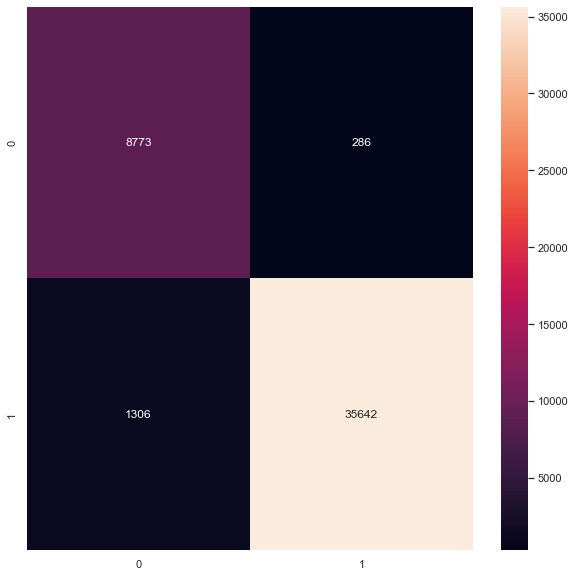

In [70]:
plt.figure(figsize=(10, 10))
sns.heatmap(conf, annot=True, fmt="g")
plt.show()